In [1]:
import functions
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [7]:
with open("results_depth_resgcn.txt") as f:
    results = f.read()
depths = range(1, 21)
resgcn_mse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[1]) for depth in depths])
resgcn_mse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[1]) for depth in depths])
resgcn_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in mse_stds])
resgcn_nse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[2]) for depth in depths])
resgcn_nse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[2]) for depth in depths])
resgcn_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in nse_stds])

In [8]:
with open("results_depth_gcnii.txt") as f:
    results = f.read()
depths = range(1, 21)
gcnii_mse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[1]) for depth in depths])
gcnii_mse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[1]) for depth in depths])
gcnii_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in mse_stds])
gcnii_nse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[2]) for depth in depths])
gcnii_nse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[2]) for depth in depths])
gcnii_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in nse_stds])

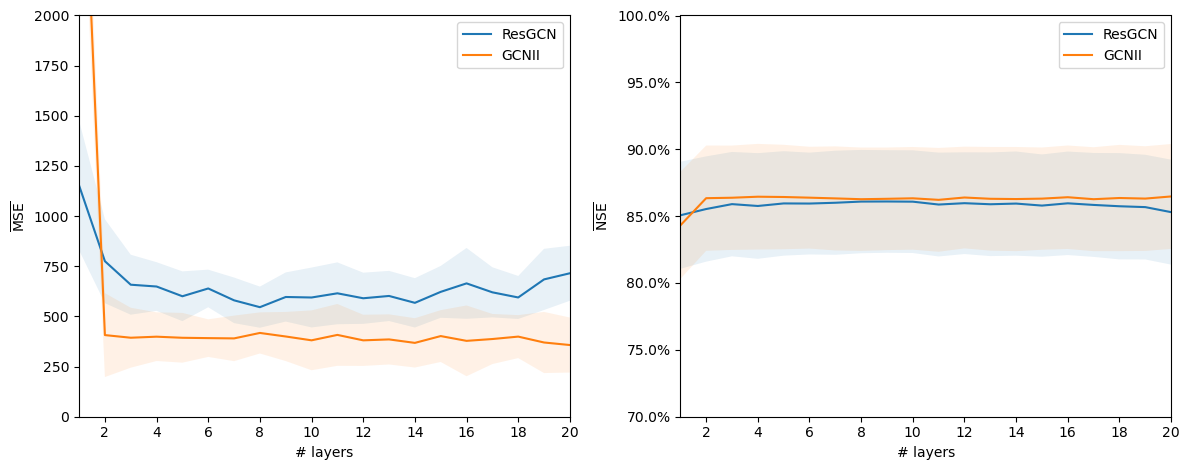

In [14]:
plt.figure(figsize=(12, 4.8))

plt.subplot(1, 2, 1)
plt.plot(depths, resgcn_mse_means, label="ResGCN")
plt.fill_between(depths, resgcn_mse_means + resgcn_mse_confs, resgcn_mse_means - resgcn_mse_confs, alpha=0.1)
plt.plot(depths, gcnii_mse_means, label="GCNII")
plt.fill_between(depths, gcnii_mse_means + gcnii_mse_confs, gcnii_mse_means - gcnii_mse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0, 2000))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{MSE}}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depths, resgcn_nse_means, label="ResGCN")
plt.fill_between(depths, resgcn_nse_means + resgcn_nse_confs, resgcn_nse_means - resgcn_nse_confs, alpha=0.1)
plt.plot(depths, gcnii_nse_means, label="GCNII")
plt.fill_between(depths, gcnii_nse_means + gcnii_nse_confs, gcnii_nse_means - gcnii_nse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0.70, 1))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{NSE}}$")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.legend()

plt.tight_layout()
plt.savefig("num_layers.pdf")
plt.show()

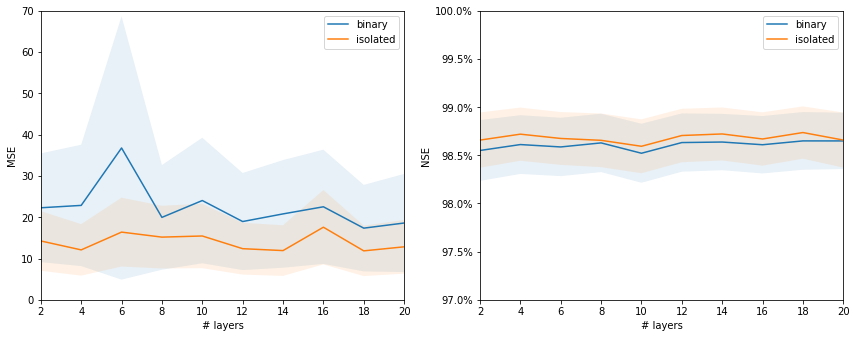

In [107]:
# 95% confidence interval
conf = lambda t:  1.96 * t.std() / (len(t) ** 0.5)
lo = lambda t: t.mean() - conf(t)
hi = lambda t: t.mean() + conf(t)

binary_keys, binary_vals = zip(*sorted(binary_results.items()))
binary_mse_means, binary_nse_means, binary_mse_hi, binary_nse_hi, binary_mse_lo, binary_nse_lo = zip(
    *[(m.mean(), n.mean(), hi(m), hi(n), lo(m), lo(n)) for m, n in binary_vals]
)
isolated_keys, isolated_vals = zip(*sorted(isolated_results.items()))
isolated_mse_means, isolated_nse_means, isolated_mse_hi, isolated_nse_hi, isolated_mse_lo, isolated_nse_lo = zip(
    *[(m.mean(), n.mean(), hi(m), hi(n), lo(m), lo(n)) for m, n in isolated_vals]
)

plt.figure(figsize=(12, 4.8))
plt.subplot(1, 2, 1)
plt.plot(binary_keys, binary_mse_means, label="binary")
plt.fill_between(binary_keys, binary_mse_hi, binary_mse_lo, alpha=0.1)
plt.plot(isolated_keys, isolated_mse_means, label="isolated")
plt.fill_between(isolated_keys, isolated_mse_hi, isolated_mse_lo, alpha=0.1)
plt.xlim((min(layer_nums), max(layer_nums)))
plt.ylim((0, 70))
plt.xlabel("# layers")
plt.ylabel("MSE")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(binary_keys, binary_nse_means, label="binary")
plt.fill_between(binary_keys, binary_nse_hi, binary_nse_lo, alpha=0.1)
plt.plot(isolated_keys, isolated_nse_means, label="isolated")
plt.fill_between(isolated_keys, isolated_nse_hi, isolated_nse_lo, alpha=0.1)
plt.xlim((min(layer_nums), max(layer_nums)))
plt.ylim((0.97, 1))
plt.xlabel("# layers")
plt.ylabel("NSE")
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.tight_layout()
plt.savefig("num_layers.pdf")
plt.show()